In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.dates as mpl_dates
from mpl_finance import candlestick_ohlc
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 7]
plt.rc('font', size=14)
import ta


/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [2]:
ticker = 'BTC-USD'
ticker = yf.Ticker(ticker)

start_date = '2022-08-01'
end_date =  '2022-08-15'

df = ticker.history(interval='15m', start = start_date, end = end_date)
df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].apply(mpl_dates.date2num)

df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
df

Date          Open          High  \
Datetime                                                              
2022-07-31 19:30:00+00:00  19204.812500  23882.744141  23914.619141   
2022-07-31 19:45:00+00:00  19204.822917  23903.181641  23903.181641   
2022-07-31 20:00:00+00:00  19204.833333  23845.201172  23877.699219   
2022-07-31 20:15:00+00:00  19204.843750  23877.345703  23877.345703   
2022-07-31 20:30:00+00:00  19204.854167  23822.376953  23822.376953   
...                                 ...           ...           ...   
2022-08-14 18:15:00+00:00  19218.760417  24263.564453  24274.566406   
2022-08-14 18:30:00+00:00  19218.770833  24274.109375  24296.960938   
2022-08-14 18:45:00+00:00  19218.781250  24296.404297  24297.718750   
2022-08-14 19:00:00+00:00  19218.791667  24294.511719  24309.529297   
2022-08-14 19:15:00+00:00  19218.802083  24314.423828  24322.357422   

                                    Low         Close  
Datetime                                               
2022-07-31 19:30:00+00:00  23869.230469  23914.619141  
2022-07-31 19:45:00+00:00  23863.697266  23863.697266  
2022-07-31 20:00:00+00:00  23845.201172  23874.107422  
2022-07-31 20:15:00+00:00  23824.312500  23824.312500  
2022-07-31 20:30:00+00:00  23799.554688  23799.554688  
...                                 ...           ...  
2022-08-14 18:15:00+00:00  24251.496094  24274.566406  
2022-08-14 18:30:00+00:00  24274.109375  24296.601562  
2022-08-14 18:45:00+00:00  24290.873047  24293.988281  
2022-08-14 19:00:00+00:00  24292.158203  24309.529297  
2022-08-14 19:15:00+00:00  24281.494141  24292.503906  

[1344 rows x 5 columns]

In [3]:
df.astype('float64')

Date          Open          High  \
Datetime                                                              
2022-07-31 19:30:00+00:00  19204.812500  23882.744141  23914.619141   
2022-07-31 19:45:00+00:00  19204.822917  23903.181641  23903.181641   
2022-07-31 20:00:00+00:00  19204.833333  23845.201172  23877.699219   
2022-07-31 20:15:00+00:00  19204.843750  23877.345703  23877.345703   
2022-07-31 20:30:00+00:00  19204.854167  23822.376953  23822.376953   
...                                 ...           ...           ...   
2022-08-14 18:15:00+00:00  19218.760417  24263.564453  24274.566406   
2022-08-14 18:30:00+00:00  19218.770833  24274.109375  24296.960938   
2022-08-14 18:45:00+00:00  19218.781250  24296.404297  24297.718750   
2022-08-14 19:00:00+00:00  19218.791667  24294.511719  24309.529297   
2022-08-14 19:15:00+00:00  19218.802083  24314.423828  24322.357422   

                                    Low         Close  
Datetime                                               
2022-07-31 19:30:00+00:00  23869.230469  23914.619141  
2022-07-31 19:45:00+00:00  23863.697266  23863.697266  
2022-07-31 20:00:00+00:00  23845.201172  23874.107422  
2022-07-31 20:15:00+00:00  23824.312500  23824.312500  
2022-07-31 20:30:00+00:00  23799.554688  23799.554688  
...                                 ...           ...  
2022-08-14 18:15:00+00:00  24251.496094  24274.566406  
2022-08-14 18:30:00+00:00  24274.109375  24296.601562  
2022-08-14 18:45:00+00:00  24290.873047  24293.988281  
2022-08-14 19:00:00+00:00  24292.158203  24309.529297  
2022-08-14 19:15:00+00:00  24281.494141  24292.503906  

[1344 rows x 5 columns]

/var/folders/fq/zgj_k1rx4sl0wk_hjxt78j3w0000gn/T/ipykernel_28599/647330685.py:43: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


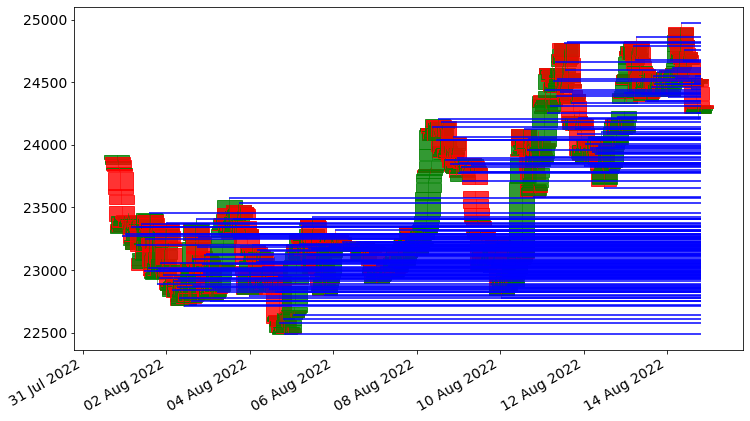

In [4]:
import datetime
from pandas.io.formats.format import DataFrameFormatter



def support_level(df, i):
    support = df['Low'][i] < df['Low'][i - 1] and df['Low'][i] < df['Low'][i +1 ] and df['Low'][i + 1] < df['Low'][i + 2] and df['Low'][i - 1] < df['Low'][i -2]
    return support


def resistance_level(df, i):
    resistance = df['High'][i] > df['High'][i - 1] and df['High'][i] > df['High'][i + 1] and df['High'][i + 1] > df['High'][i + 2] and df['High'][i - 1] > df['High'][i - 2]
    return resistance

    
    
levels = []
level_types = []
for i in range(2, df.shape[0] - 2):
    if support_level(df, i):
        levels.append((i, df['Low'][i]))
        level_types.append(1)
        
    elif resistance_level(df, i):
        levels.append((i, df['High'][i]))
        level_types.append(0)
        
def plot_levels():
    fig, ax = plt.subplots()
    candlestick_ohlc(ax, df.values, width=0.6, colorup='green', colordown='red', alpha=0.8)
    date_format = mpl_dates.DateFormatter('%d %b %Y')
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()
    
    
    for level, level_type in zip(levels, level_types):
        plt.hlines(level[1],
                  xmin = df['Date'][level[0]],
                  xmax = max(df['Date']),
                  colors = 'blue')
        #plt.text(df['Date'][level[0]], level[1], (str(level_types) + ": " + str(level[1] + " "), ha='right', va='center', fontweight='bold', fontsize='x-small'))
        #plt.title('support & resistance lavels for ' + ticker_symbol, fontsize=24, fontweight='bold')
        fig.show()
        
plot_levels()
            

In [5]:
df.dtypes

Date     float64
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [6]:
resistance_level

<function __main__.resistance_level(df, i)>

In [7]:
df.reset_index()

Datetime          Date          Open          High  \
0    2022-07-31 19:30:00+00:00  19204.812500  23882.744141  23914.619141   
1    2022-07-31 19:45:00+00:00  19204.822917  23903.181641  23903.181641   
2    2022-07-31 20:00:00+00:00  19204.833333  23845.201172  23877.699219   
3    2022-07-31 20:15:00+00:00  19204.843750  23877.345703  23877.345703   
4    2022-07-31 20:30:00+00:00  19204.854167  23822.376953  23822.376953   
...                        ...           ...           ...           ...   
1339 2022-08-14 18:15:00+00:00  19218.760417  24263.564453  24274.566406   
1340 2022-08-14 18:30:00+00:00  19218.770833  24274.109375  24296.960938   
1341 2022-08-14 18:45:00+00:00  19218.781250  24296.404297  24297.718750   
1342 2022-08-14 19:00:00+00:00  19218.791667  24294.511719  24309.529297   
1343 2022-08-14 19:15:00+00:00  19218.802083  24314.423828  24322.357422   

               Low         Close  
0     23869.230469  23914.619141  
1     23863.697266  23863.697266  
2     23845.201172  23874.107422  
3     23824.312500  23824.312500  
4     23799.554688  23799.554688  
...            ...           ...  
1339  24251.496094  24274.566406  
1340  24274.109375  24296.601562  
1341  24290.873047  24293.988281  
1342  24292.158203  24309.529297  
1343  24281.494141  24292.503906  

[1344 rows x 6 columns]

In [8]:
df.dtypes

Date     float64
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

/var/folders/fq/zgj_k1rx4sl0wk_hjxt78j3w0000gn/T/ipykernel_28599/647330685.py:43: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


[(13, 23275.703125), (32, 23342.224609375), (44, 23196.669921875), (62, 22994.611328125), (74, 23454.7578125), (93, 22890.796875), (97, 22936.39453125), (99, 23057.212890625), (127, 22837.22265625), (144, 22778.6640625), (154, 22712.75390625), (183, 23406.29296875), (201, 23123.572265625), (259, 23578.02734375), (373, 22575.986328125), (385, 22487.90625), (406, 22645.244140625), (726, 24142.966796875), (735, 24039.91796875), (738, 24203.689453125), (756, 23877.5234375), (786, 23771.3828125), (792, 23821.724609375), (795, 23711.5078125), (943, 23960.138671875), (985, 24434.03515625), (990, 24251.029296875), (996, 24310.037109375), (1004, 24512.380859375), (1008, 24657.1953125), (1030, 24811.087890625), (1032, 24600.619140625), (1059, 24086.0625), (1120, 23657.265625), (1195, 24860.05078125), (1267, 24379.130859375), (1297, 24974.9140625), (1305, 24756.876953125)]


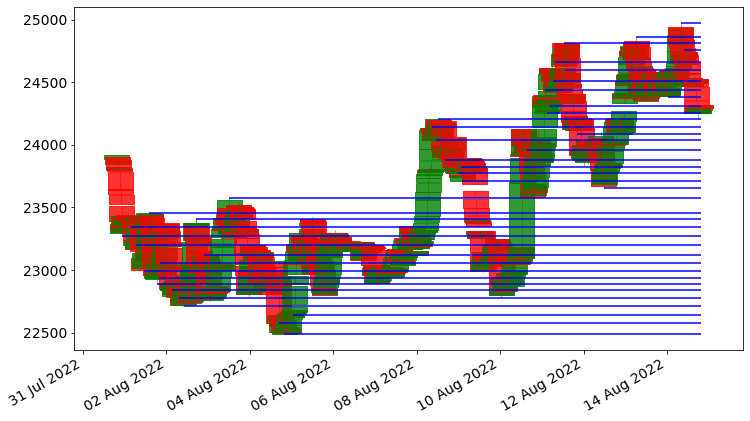

In [9]:
mean = np.mean(df['High'] - df['Low'])
mean

def distance_from_level(x):
    return np.sum([abs(x - y) < mean for y in levels]) == 0

levels = []
for i in range(2, df.shape[0] - 2):
    if support_level(df, i):
        x = df['Low'][i]
        
        if distance_from_level(x):
            levels.append((i, x))
            
    elif resistance_level(df, i):
        x = df['High'][i]
        
        if distance_from_level(x):
             levels.append((i, x))
        
plot_levels()
print(levels)
            

level_df = pd.DataFrame(levels)
         

In [10]:
level_df.count()

0    38
1    38
dtype: int64

In [11]:
df.dtypes

Date     float64
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [12]:
atr_multiple = 2
n = 20

high_low = df['High'] - df['Low']
high_close = np.abs(df['High'] - df['Close'].shift())
low_close = np.abs(df['Low'] - df['Close'].shift())


ranges = pd.concat([high_low, high_close, low_close], axis=1)
true_range = np.max(ranges, axis=1)


In [13]:
df[['avehigh', 'avelow']] = df[['Open', 'Low']].rolling(n).mean()
df['avemidprice'] = (df['avehigh'] + df['avelow']) / 2

In [14]:
indicator_atr = ta.volatility.AverageTrueRange(df['High'], df['Low'], df['Close'], window=14, fillna=False)
df['atr14'] = true_range.rolling(14).sum()/12

df['UPB'] = df['avemidprice'] + atr_multiple * df['atr14']
df['LPB'] = df['avemidprice'] - atr_multiple * df['atr14']

In [15]:
df['rangemaxprice'] = df[['High']].rolling(n).max()
df['rangeminprice'] = df[['High']].rolling(n).min()
df['sideways'] = 0

In [16]:
def sideways_range(maxp, minp, upb, lpb):
    if maxp < upb and maxp > lpb and minp < upb and minp > lpb:
        return 1
    else:
        return 0

In [17]:
df['sideways'] = df[['rangemaxprice', 'rangeminprice', 'UPB', 'LPB']].apply(lambda x: sideways_range(x['rangemaxprice'], x['rangeminprice'], x['UPB'], x['LPB']), axis=1)


In [18]:
sideways_1 = df.loc[df['sideways'] == 1]
#sideways_1.head()
#print(sideways_1)
sideways_1 = pd.DataFrame(sideways_1)
sideways_1.count()


Date             156
Open             156
High             156
Low              156
Close            156
avehigh          156
avelow           156
avemidprice      156
atr14            156
UPB              156
LPB              156
rangemaxprice    156
rangeminprice    156
sideways         156
dtype: int64

In [19]:
sideways_writer = pd.ExcelWriter('sideways.xlsx')

In [20]:
sideways_1.to_excel(sideways_writer)
 

sideways_writer.save()
print("DataFrame is exported successfully to Excel File.")


ValueError: Excel does not support datetimes with timezones. Please ensure that datetimes are timezone unaware before writing to Excel.